<h1 style="text-align: center">Support Vector Machine</h1>

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from scipy.spatial.distance import cdist

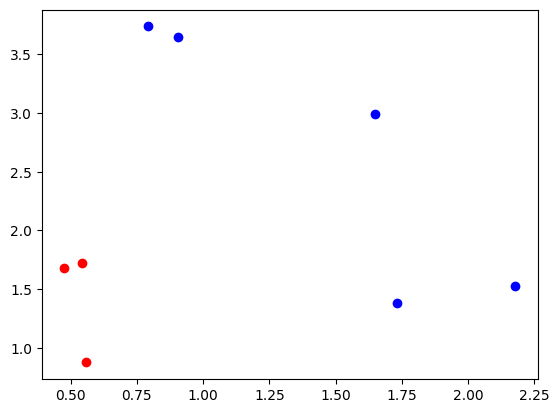

In [6]:
X1 = np.random.multivariate_normal([1,1], [[1, 0], [0, 1]], size = 3)
X2 = np.random.multivariate_normal([2,2], [[1, 0], [0, 1]], size = 5)

plt.scatter(X2[:, 0], X2[:, 1], c = "blue")
plt.scatter(X1[:, 0], X1[:, 1], c = "red")

In [9]:
!pip install -U scikit-learn

     ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
      --------------------------------------- 0.1/9.3 MB 1.4 MB/s eta 0:00:07
     - -------------------------------------- 0.2/9.3 MB 1.8 MB/s eta 0:00:06
     - -------------------------------------- 0.3/9.3 MB 1.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/9.3 MB 2.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.6/9.3 MB 2.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/9.3 MB 2.2 MB/s eta 0:00:04
     --- ------------------------------------ 0.9/9.3 MB 2.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.1/9.3 MB 2.7 MB/s eta 0:00:04
     ----- ---------------------------------- 1.3/9.3 MB 2.8 MB/s eta 0:00:03
     ------ --------------------------------- 1.5/9.3 MB 3.1 MB/s eta 0:00:03
     ------- -------------------------------- 1.7/9.3 MB 3.2 MB/s eta 0:00:03


In [10]:
!pip install seaborn
!pip install opencv-python

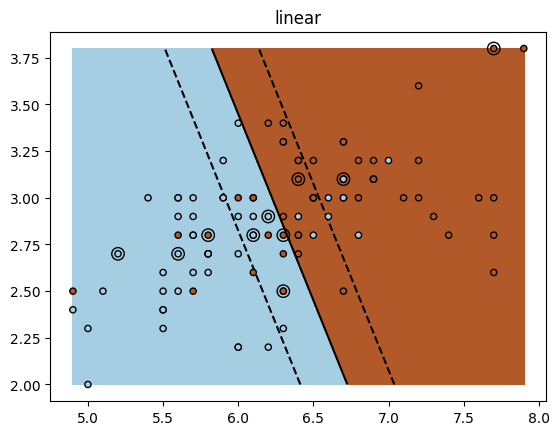

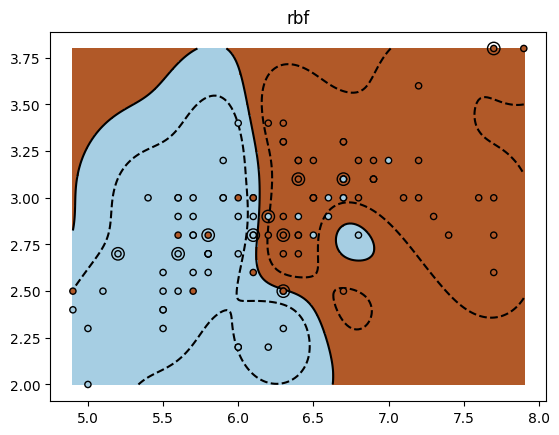

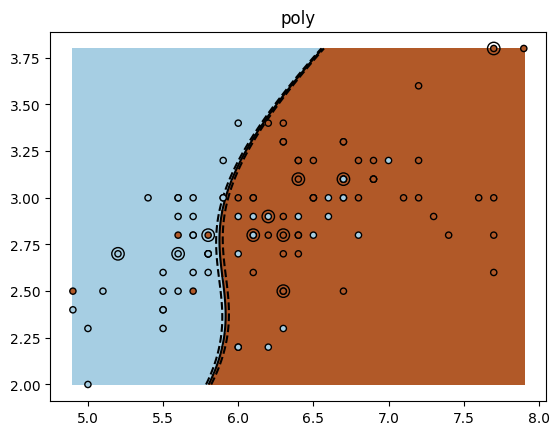

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

In [14]:
np.random.multivariate_normal([1,1], [[1,0], [0, 1]], 5).shape

(5, 2)

In [17]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 

In [29]:
X0.T

array([[2.18060433, 2.11846087, 3.0920616 , 2.29956564, 1.49267276,
        1.79899274, 1.21951791, 2.32584911, 1.81367524, 1.67240423],
       [1.96421193, 2.66133611, 3.03045041, 2.11775698, 1.44637609,
        2.05919044, 1.42594145, 2.32586616, 1.29657045, 1.93037837]])

In [35]:
X = np.concatenate((X0, X1), axis = 0).T
y = np.concatenate((np.ones(N), -1 * np.ones(N)), axis = 0)

In [37]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [38]:
X

array([[2.18060433, 2.11846087, 3.0920616 , 2.29956564, 1.49267276,
        1.79899274, 1.21951791, 2.32584911, 1.81367524, 1.67240423,
        3.85511216, 4.48086007, 4.14330184, 3.77487137, 4.23379466,
        4.16391014, 3.10502215, 3.63784508, 3.04656172, 3.06207882],
       [1.96421193, 2.66133611, 3.03045041, 2.11775698, 1.44637609,
        2.05919044, 1.42594145, 2.32586616, 1.29657045, 1.93037837,
        2.08488775, 2.17631696, 1.5019285 , 1.75338525, 2.34684366,
        1.85502728, 2.0952162 , 1.9232835 , 0.9375969 , 1.40408552]])

In [41]:
V = np.concatenate((X0.T, -X1.T), axis = 1)